In [1]:
import numpy as np             #import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')   #read the data set

In [3]:
Label = pd.get_dummies(data['Label'],drop_first=True)   #Label is converted into numerical values

In [7]:
X = data.drop(['Label','MAC'], axis = 1) #define the features as X

In [8]:
y = data['Label'] #define the label as Y

In [9]:
from sklearn.model_selection import train_test_split  #import the data selection libr
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

<AxesSubplot:xlabel='Entropy', ylabel='payload_l'>

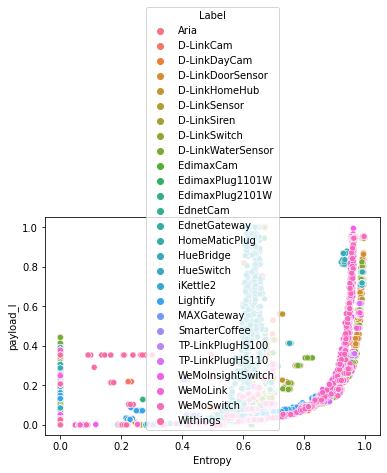

In [10]:
#Normalization
min_train = X_train.min() #get the minimum values of training features
range_train = (X_train-min_train).max()  #get range of the data features
X_train_scaled = (X_train-min_train)/range_train #normalizing the features
sns.scatterplot( x = X_train_scaled['Entropy'], y =X_train_scaled ['payload_l'],hue = 'Label', data = data) #viasualize the particular faetures after

In [11]:
min_test = X_test.min()     #normalizing the testing features
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [12]:
from sklearn.ensemble import RandomForestClassifier     #import the random forest algorithm

In [13]:
rfc = RandomForestClassifier(n_estimators=300)    #define the algorithm parameters

In [14]:
rfc.fit(X_train_scaled,y_train)  #data fitting for trainiing 

RandomForestClassifier(n_estimators=300)

In [15]:
predictions = rfc.predict(X_test_scaled)  #test the performance of the algorithm

In [16]:
from sklearn.metrics import classification_report #import the performance evaluavtion m

In [17]:
print(classification_report(y_test,predictions))  #print the performance of the algo

                   precision    recall  f1-score   support

             Aria       0.55      0.68      0.61        76
        D-LinkCam       0.90      0.77      0.83      1018
     D-LinkDayCam       0.70      0.69      0.70       197
 D-LinkDoorSensor       0.84      0.66      0.74       309
    D-LinkHomeHub       0.58      0.81      0.67      1367
     D-LinkSensor       0.25      0.23      0.24      1074
      D-LinkSiren       0.26      0.22      0.24       993
     D-LinkSwitch       0.61      0.52      0.56      1070
D-LinkWaterSensor       0.33      0.33      0.33      1056
        EdimaxCam       0.83      0.57      0.67       152
  EdimaxPlug1101W       0.57      0.40      0.47       193
  EdimaxPlug2101W       0.30      0.20      0.24       168
         EdnetCam       0.92      0.50      0.65        66
     EdnetGateway       0.87      0.51      0.64       140
    HomeMaticPlug       1.00      0.67      0.80        96
        HueBridge       0.81      0.67      0.74      2

In [18]:
from sklearn.metrics import confusion_matrix #import the confusion matrix

In [19]:
cm = confusion_matrix(y_test,predictions)  #define the confusion matrix as cm

Text(123.0, 0.5, 'True Class')

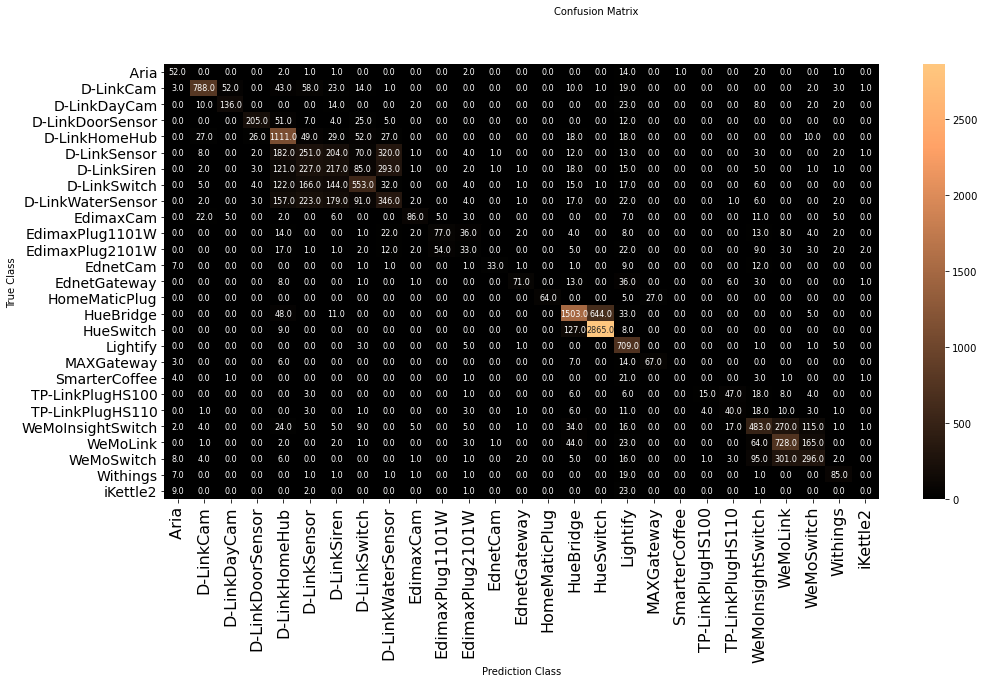

In [20]:
fig=plt.figure(figsize=(16,8))
xticklabel=[' Aria','D-LinkCam', 'D-LinkDayCam', 'D-LinkDoorSensor', 'D-LinkHomeHub','D-LinkSensor','D-LinkSiren','D-LinkSwitch', 'D-LinkWaterSensor' ,'EdimaxCam', 'EdimaxPlug1101W','EdimaxPlug2101W','EdnetCam','EdnetGateway','HomeMaticPlug','HueBridge','HueSwitch','Lightify','MAXGateway','SmarterCoffee','TP-LinkPlugHS100','TP-LinkPlugHS110','WeMoInsightSwitch','WeMoLink','WeMoSwitch', 'Withings','iKettle2']
plt.xticks(fontsize=16)

cm = confusion_matrix(y_test,predictions) #define the confusion matrix as cm
sns.heatmap(cm, annot=True,fmt=".1f",xticklabels =xticklabel, yticklabels=xticklabel,cmap="copper",annot_kws={"size": 8})
plt.yticks(fontsize=14,rotation=0)  #visualize the confusion matrix
fig.suptitle('Confusion Matrix', fontsize=10)
plt.xlabel("Prediction Class",fontsize=10)
plt.ylabel("True Class",fontsize=10)

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Log_ROC_auc = roc_auc_score(y_test,rfc.predict(X_test_scaled))
fpr,tpr,thresholds = roc_curve(y_test,rfc.predict_proba(X_test_scaled)[:,1])

ValueError: could not convert string to float: 'WeMoLink'

In [ ]:
plt.figure()
plt.plot(fpr,tpr,label='Random Forest model (area = %0.2f)' % Log_ROC_auc)
plt.plot((0,1),(0,1),'r--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()